This Notebook is about the Perspective transormtion on a stop sign.

In [3]:
#load the libs
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


In [4]:
# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

In [12]:
# Read in an image
img = cv2.imread('test_img.jpg')
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y
print(img.shape)

(960, 1280, 3)


In [22]:
# MODIFY THIS FUNCTION TO GENERATE OUTPUT 
# THAT LOOKS LIKE THE IMAGE ABOVE
def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
    undistoted_img = cv2.undistort(img,mtx,dist,None, mtx)
    
    # 2) Convert to grayscale    
    gray_img = cv2.cvtColor(undistoted_img,cv2.COLOR_BGR2GRAY)
    
    # 3) Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray_img, (8,6), None)
    
    # 4) If corners found: 
            # a) draw corners
    if ret == True:
        cv2.drawChessboardCorners(undistoted_img, (8,6), corners, ret)
            # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
                 #Note: you could pick any four of the detected corners 
                 # as long as those four corners define a rectangle
                 #One especially smart way to do this would be to use four well-chosen
                 # corners that were automatically detected during the undistortion steps
                 #We recommend using the automatic detection of corners in your code
            # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
            # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
            # e) use cv2.warpPerspective() to warp your image to a top-down view
    #delete the next two lines
    temp_corn = np.copy(corners)
    temp_corn = temp_corn.reshape(48,2)
    src = np.array([temp_corn[0],temp_corn[7],temp_corn[-1],temp_corn[-8]])
    
    offset = 100
    img_size = (undistoted_img.shape[1],undistoted_img.shape[0])
    
    dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
        
    
    
    M = cv2.getPerspectiveTransform(src,dst)
    #Minv = cv2.getPerspectiveTransform(dst, src)
    warped = cv2.warpPerspective(undistoted_img, M, img_size, flags=cv2.INTER_LINEAR)
    return warped, M

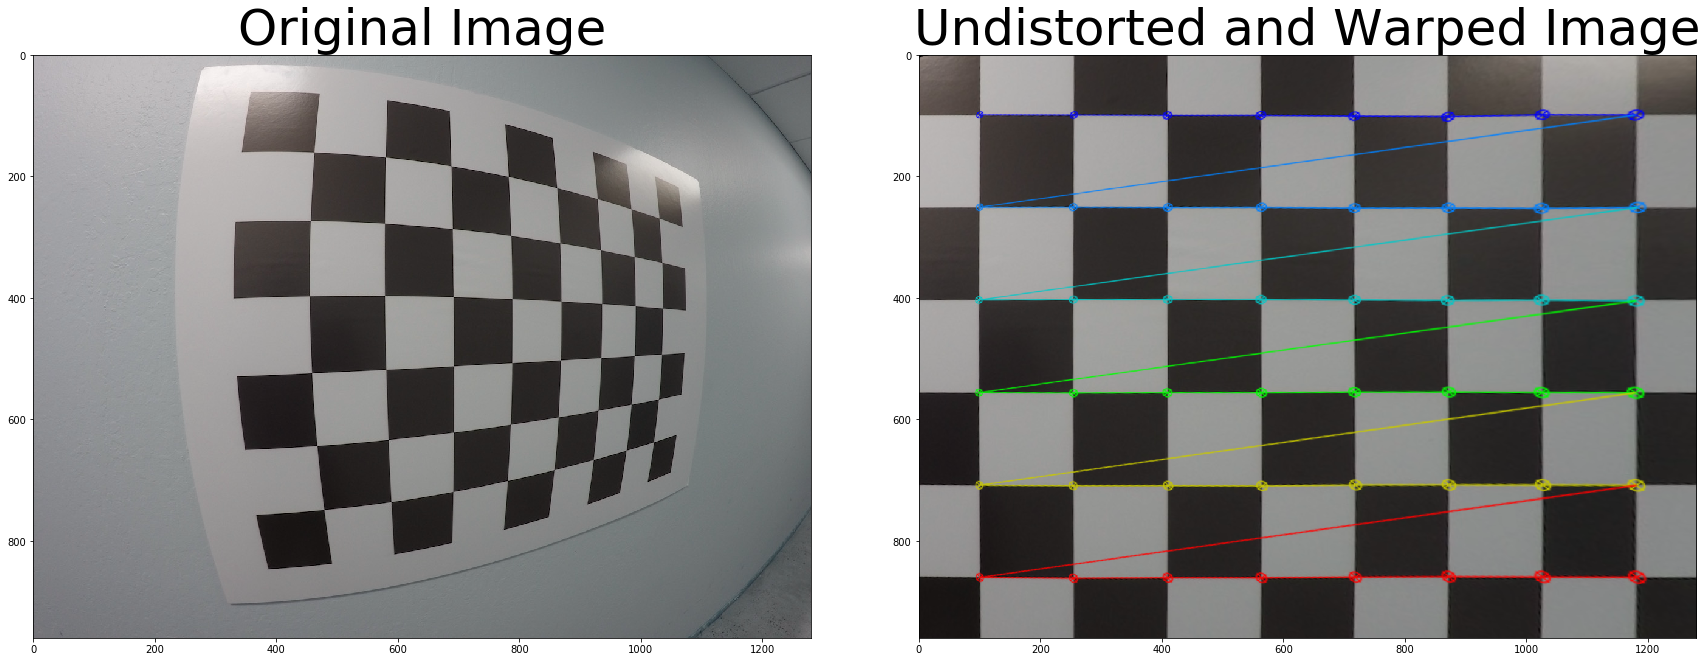

In [23]:
top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
